In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pywt

In [2]:
chile2 = pd.read_csv('data/peru.csv')

In [3]:
chile2

,time,latitude,longitude,pmsl,u_mean,v_mean,uv_mag_mean,taux_mean,tauy_mean,curl,ektrx,ektry
0,UTC,degrees_north,degrees_east,Mb,m s-1,m s-1,m s-1,N m-2,N m-2,MPa m-1,kg m-1 s-1,kg m-1 s-1
1,1967-01-16T12:00:00Z,-22.5,288.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1967-02-15T00:00:00Z,-22.5,288.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1967-03-16T12:00:00Z,-22.5,288.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1967-04-16T00:00:00Z,-22.5,288.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
661,2022-01-17T12:00:00Z,-22.5,288.5,1013.6317,3.2396762,9.0105505,9.73488,0.057617944,0.16687661,2.0859709,-2998.1936,1035.1945
662,2022-02-16T00:00:00Z,-22.5,288.5,1013.23755,3.5496583,8.989966,9.868338,0.06132964,0.16659985,1.9092829,-2993.2212,1101.8807
663,2022-03-17T12:00:00Z,-22.5,288.5,1004.8713,2.9156704,8.353846,9.012319,0.049171567,0.14655867,1.4020122,-2633.1506,883.4424
664,2022-04-17T00:00:00Z,-22.5,288.5,1013.56836,3.3779306,10.166361,10.79733,0.061308037,0.18709838,0.012160442,-3361.5085,1101.4927


In [4]:
chile2 = chile2.dropna().reset_index(drop=True)

In [5]:
def upwell(ektrx, ektry, coast_angle):
  pi = 3.1415927
  degtorad = pi/180.
  alpha = (360 - coast_angle) * degtorad
  s1 = np.cos(alpha)
  t1 = np.sin(alpha)
  s2 = -1 * t1
  t2 = s1
  perp = (s1 * ektrx) + (t1 * ektry)
  para = (s2 * ektrx) + (t2 * ektry)
  return(perp/10)

In [6]:
coast_angle = 205

In [7]:
upwelling_index = ["kg"]

for i in range(len(chile2.index)):
    if not i == 0: 
        ektrx = float(chile2.loc[[i]]['ektrx'])
        ektry = float(chile2.loc[[i]]['ektry'])
        # print(ektrx)
        # print(ektry)
        # print(upwell(ektrx, ektry, coast_angle))
        upwelling_index.append(upwell(ektrx, ektry, coast_angle))

In [8]:
len(upwelling_index)

498

In [9]:
chile2['Upwelling'] = upwelling_index

In [10]:
chile2

,time,latitude,longitude,pmsl,u_mean,v_mean,uv_mag_mean,taux_mean,tauy_mean,curl,ektrx,ektry,Upwelling
0,UTC,degrees_north,degrees_east,Mb,m s-1,m s-1,m s-1,N m-2,N m-2,MPa m-1,kg m-1 s-1,kg m-1 s-1,kg
1,1981-01-16T12:00:00Z,-22.5,288.5,1013.79987,-1.4814938,6.9136953,7.246706,-0.014523644,0.07455375,0.2542367,-1339.4722,-260.93948,110.369633
2,1981-02-15T00:00:00Z,-22.5,288.5,1011.90607,-0.46168762,5.203022,5.453932,-0.0021537899,0.0480296,0.12539513,-862.92523,-38.69613,76.572218
3,1981-03-16T12:00:00Z,-22.5,288.5,1013.40204,-1.7045864,5.3007092,5.8738594,-0.01437768,0.050067224,0.13702443,-899.53424,-258.317,70.608543
4,1981-04-16T00:00:00Z,-22.5,288.5,1013.75385,-1.8688933,3.5526013,4.498995,-0.012205008,0.027285254,0.038747128,-490.2213,-219.28165,35.161897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,2022-01-17T12:00:00Z,-22.5,288.5,1013.6317,3.2396762,9.0105505,9.73488,0.057617944,0.16687661,2.0859709,-2998.1936,1035.1945,315.477832
494,2022-02-16T00:00:00Z,-22.5,288.5,1013.23755,3.5496583,8.989966,9.868338,0.06132964,0.16659985,1.9092829,-2993.2212,1101.8807,317.84546
495,2022-03-17T12:00:00Z,-22.5,288.5,1004.8713,2.9156704,8.353846,9.012319,0.049171567,0.14655867,1.4020122,-2633.1506,883.4424,275.98038
496,2022-04-17T00:00:00Z,-22.5,288.5,1013.56836,3.3779306,10.166361,10.79733,0.061308037,0.18709838,0.012160442,-3361.5085,1101.4927,351.207228


In [16]:
x_list = []

for i in range(len(upwelling_index)):
    x_list.append(i)

In [17]:
center_function = lambda x: x - x.mean()

In [18]:
chile2_normalized = center_function(chile2['Upwelling'][1:]) / 10

In [19]:
N = len(chile2_normalized)
t0=1871
dt=1/12
time = np.arange(0, N) * dt + t0

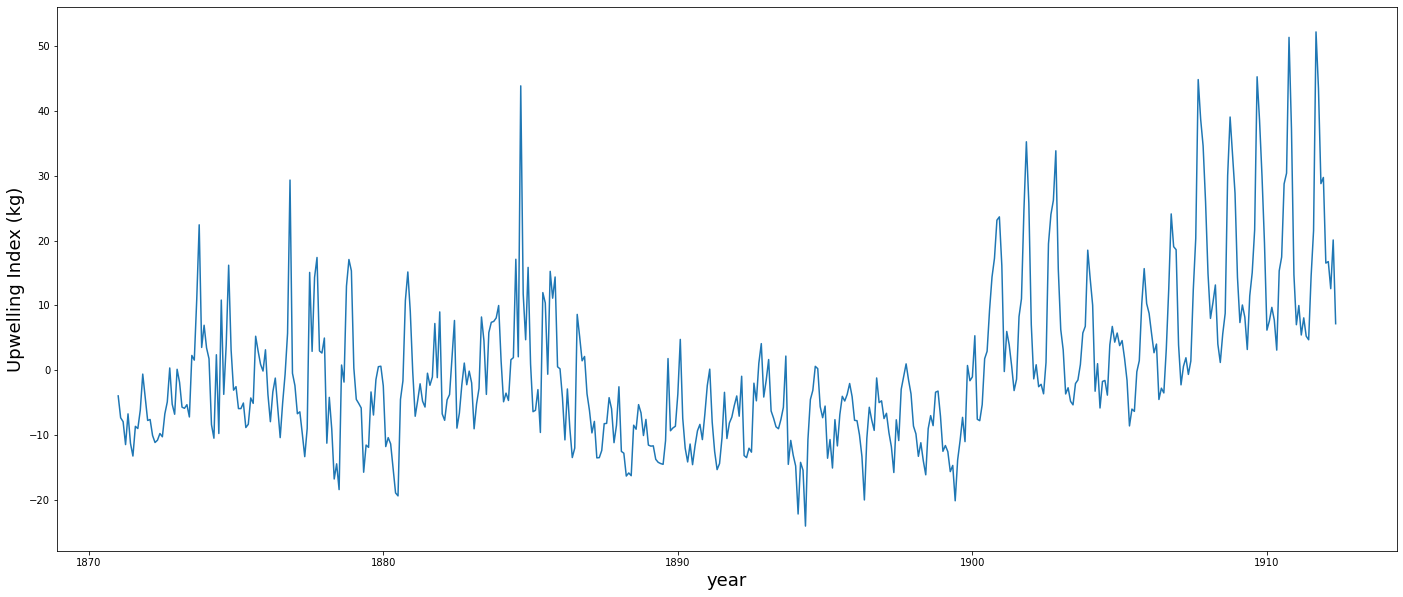

In [21]:
fig, ax = plt.subplots(figsize=(24, 10))

ax.plot(time, chile2_normalized)
ax.set_xlabel('year', fontsize = 18)
ax.set_ylabel('Upwelling Index (kg)', fontsize=18)
plt.show()

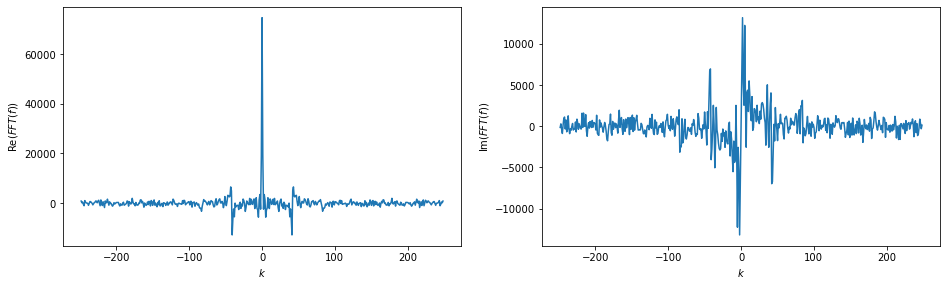

In [22]:
f_fft = np.fft.fft(chile2['Upwelling'][1:])

f_fft = np.fft.fftshift(f_fft)

N_grid = len(chile2.index) - 1

freq_grid =np.linspace(- N_grid/2, N_grid/2, N_grid)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(14, 5))

fig.tight_layout(pad=5.0)

ax0.plot(freq_grid, f_fft.real)
ax0.set_xlabel(r'$k$')
ax0.set_ylabel(r'Re($FFT(f)$)')


ax1.plot(freq_grid, f_fft.imag)
ax1.set_xlabel(r'$k$')
ax1.set_ylabel(r'Im($FFT(f)$)')


plt.show()

In [23]:
time = x_list[1:]

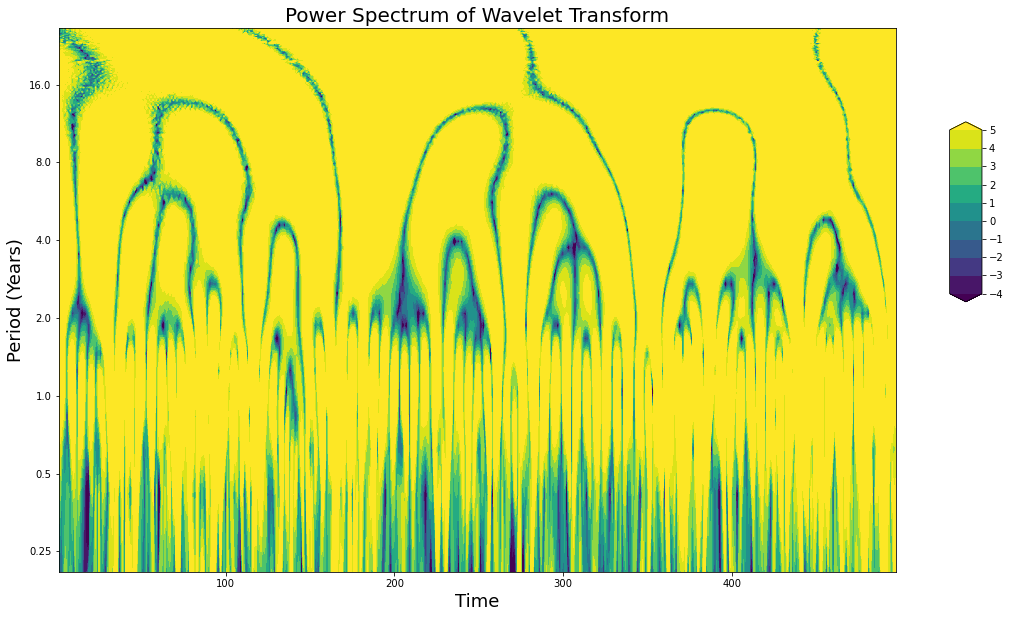

In [24]:
scales = np.arange(1, 128)

[wc, freq] = pywt.cwt(chile2_normalized, scales, 'gaus3', 1/12)

power = wc**2
period = 1. / freq

levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32]
contourlevels = np.log2(levels)
    
fig, ax = plt.subplots(figsize=(15, 10))
im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both')
    
ax.set_title('Power Spectrum of Wavelet Transform', fontsize=20)    
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Period (Years)', fontsize=18)

yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(yticks))
ax.set_yticklabels(yticks)
    
cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
fig.colorbar(im, cax=cbar_ax, orientation="vertical")
plt.show()

In [63]:
wc

array([[-5.69955957e+01,  3.11756118e+01,  2.55633478e-01, ...,
         1.68971990e+01, -7.65451002e+01,  3.24743471e+01],
       [-7.01023549e+01, -5.61833079e+00,  4.72896068e+01, ...,
        -1.19351500e+02, -9.10683205e+01,  1.01469910e+02],
       [-7.35373500e+01, -3.04830705e+01,  2.51460518e+01, ...,
        -9.27289321e+01, -1.82489979e+01,  1.29592550e+02],
       ...,
       [-8.06304119e+02, -7.77326771e+02, -7.65692507e+02, ...,
         1.67131874e+03,  1.66060390e+03,  1.72510944e+03],
       [-8.12415951e+02, -7.63672602e+02, -8.05742200e+02, ...,
         1.67361145e+03,  1.69713197e+03,  1.67833691e+03],
       [-7.89526721e+02, -8.08925065e+02, -7.95026001e+02, ...,
         1.68244335e+03,  1.67928466e+03,  1.69499360e+03]])

In [58]:
np.max(np.log2(power))

21.54497790559278

In [42]:
len(power[0])

497

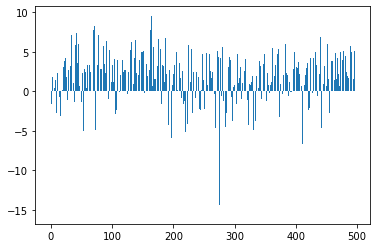

In [93]:
plt.bar(range(len(power[0])), np.log2(power[0]))
plt.show()

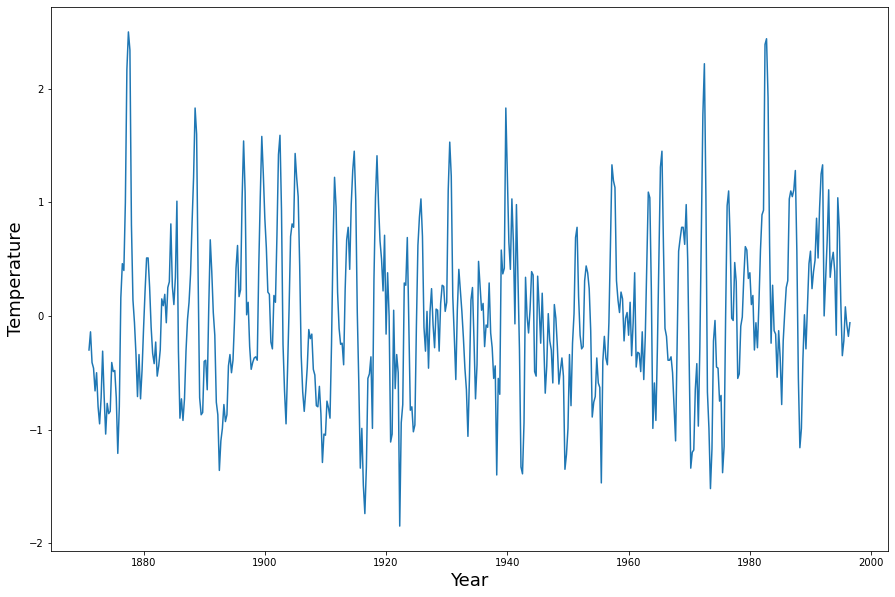

In [63]:
dataset = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
df_nino = pd.read_table(dataset)
N = df_nino.shape[0]

t0=1871 # initial year
dt=0.25 # data measured 4 times each year
time = np.arange(0, N) * dt + t0
data = df_nino.values.squeeze()

fig, ax = plt.subplots(figsize=(15, 10))


ax.plot(time, data)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Temperature', fontsize=18)
plt.show()

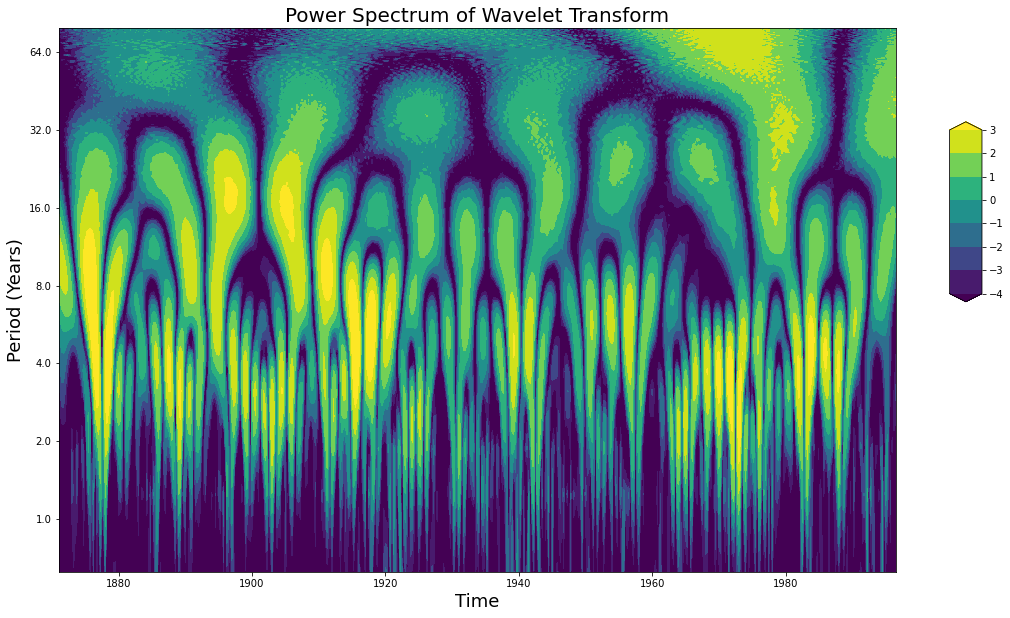

In [64]:
scales = np.arange(1, 128)

[wc, freq] = pywt.cwt(data, scales, 'gaus3', dt)

power = wc**2
period = 1. / freq

levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
contourlevels = np.log2(levels)
    
fig, ax = plt.subplots(figsize=(15, 10))
im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both')
    
ax.set_title('Power Spectrum of Wavelet Transform', fontsize=20)    
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Period (Years)', fontsize=18)

yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(yticks))
ax.set_yticklabels(yticks)
    
cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
fig.colorbar(im, cax=cbar_ax, orientation="vertical")
plt.show()